# **Insurance Cost Prediction - EDA**

## **Problem Statement**

In the context of health insurance cost prediction, Exploratory Data Analysis (EDA) is crucial to understanding the structure, trends, and patterns in the dataset. By visualizing distributions, detecting outliers, and analyzing correlations among variables, EDA aims to uncover key insights that influence premium costs and identify significant predictors.

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 28.2MB/s]


**Storing a dataset into a variable to perform operations**

In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
data.shape

(986, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


- All the columns having numeric data i.e. integer datatype.
- No null values are available in dataset.
- Memory usage of dataset is 84.9 KB.

In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


- There are 986 unique individuals in the dataset.
- The mean age of the individuals is approximately 41.75 years, with the youngest being 18 and the oldest 66. The majority of individuals fall between the ages of 30 and 53.
- Around 42% of the population has diabetes, making it a significant health concern.
- Nearly 47% of individuals have reported blood pressure problems, the most prevalent medical condition in the dataset.
- Only 5.58% of individuals have undergone transplants, making it a rare occurrence in this population.
- 18.05% of individuals have chronic diseases, indicating a relatively lower prevalence compared to diabetes and blood pressure problems.
- About 21.5% of individuals have known allergies, which could influence their healthcare requirements.
- Around 11.76% of individuals have a family history of cancer, suggesting potential genetic risk factors.
- The average number of major surgeries reported is 0.67 per person, with most individuals having undergone at least one major surgery.
- The average height is 168.18 cm, ranging from 145 to 188 cm.
- The average weight is 76.95 kg, ranging from 51 to 132 kg, suggesting a diverse population with varying health profiles.
- The average insurance premium price is 24,336.71, with a minimum of 15,000 and a maximum of 40,000.
- The majority of premiums fall between 21,000 and 28,000, with higher premiums likely corresponding to individuals with multiple health risk factors.

### Missing Values Analysis

In [ ]:
data.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [ ]:
(data.isnull().sum()/data.shape[0])*100

,0
Age,0.0
Diabetes,0.0
BloodPressureProblems,0.0
AnyTransplants,0.0
AnyChronicDiseases,0.0
Height,0.0
Weight,0.0
KnownAllergies,0.0
HistoryOfCancerInFamily,0.0
NumberOfMajorSurgeries,0.0


- There there are no missing values in any of the columns of dataset.

In [ ]:
data.dtypes

,0
Age,int64
Diabetes,int64
BloodPressureProblems,int64
AnyTransplants,int64
AnyChronicDiseases,int64
Height,int64
Weight,int64
KnownAllergies,int64
HistoryOfCancerInFamily,int64
NumberOfMajorSurgeries,int64


- We can see that datatypes of all columns are integer in dataset

In [ ]:
data.columns # Columns in available dataset

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
for i in data.columns:
    data[i] = data[i].astype('int32')

In [ ]:
data.dtypes

,0
Age,int32
Diabetes,int32
BloodPressureProblems,int32
AnyTransplants,int32
AnyChronicDiseases,int32
Height,int32
Weight,int32
KnownAllergies,int32
HistoryOfCancerInFamily,int32
NumberOfMajorSurgeries,int32


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int32
 1   Diabetes                 986 non-null    int32
 2   BloodPressureProblems    986 non-null    int32
 3   AnyTransplants           986 non-null    int32
 4   AnyChronicDiseases       986 non-null    int32
 5   Height                   986 non-null    int32
 6   Weight                   986 non-null    int32
 7   KnownAllergies           986 non-null    int32
 8   HistoryOfCancerInFamily  986 non-null    int32
 9   NumberOfMajorSurgeries   986 non-null    int32
 10  PremiumPrice             986 non-null    int32
dtypes: int32(11)
memory usage: 42.5 KB


- All columns have 986 non-null entries, so there is no missing data in this dataset.
- Memory usage of dataset is 42.5 KB.

### **Column Profiling**

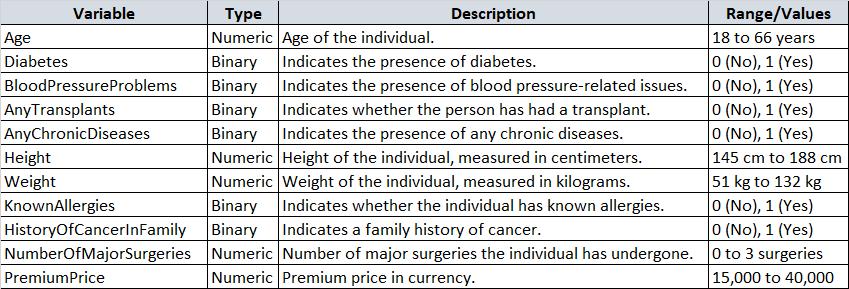

In [ ]:
data.nunique()

,0
Age,49
Diabetes,2
BloodPressureProblems,2
AnyTransplants,2
AnyChronicDiseases,2
Height,44
Weight,74
KnownAllergies,2
HistoryOfCancerInFamily,2
NumberOfMajorSurgeries,4


- The dataset contains 6 binary columns and 5 numeric columns based on the description provided in Column Profiling

In [ ]:
num_cols = data.columns[data.nunique() > 2]

### **Distribution Analysis**

#### Age Distribution

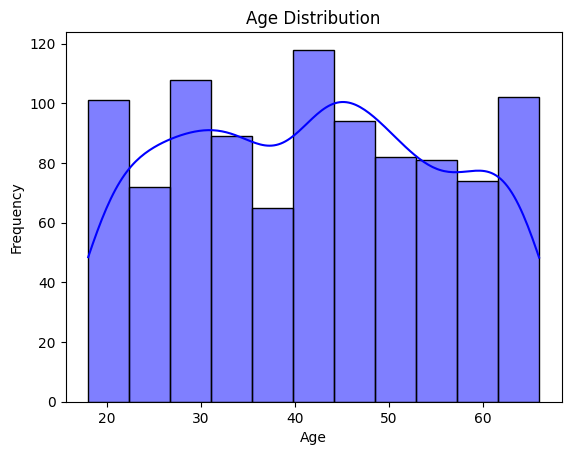

In [ ]:
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The dataset includes individuals aged between 18 and 66 years, with a relatively uniform distribution across this range.
- The mean age of the individuals is approximately 42 years, with peaks in the distribution around ages 25-30, 40-45, and 60.
- The majority of individuals fall within the ages of 25 to 55, suggesting a balanced representation of working-age and middle-aged individuals.
- The KDE line shows slight dips in the mid-30s and mid-50s, but these age groups still have a fair representation.
- There is no significant skew in the age distribution, meaning age can be used as a predictor variable in statistical modeling without requiring transformation.
- For segmentation, age groups such as 18-30, 31-45, and 46-66 could be explored for more focused analyses or hypothesis testing related to health conditions or premium pricing trends.

#### Height Distribution

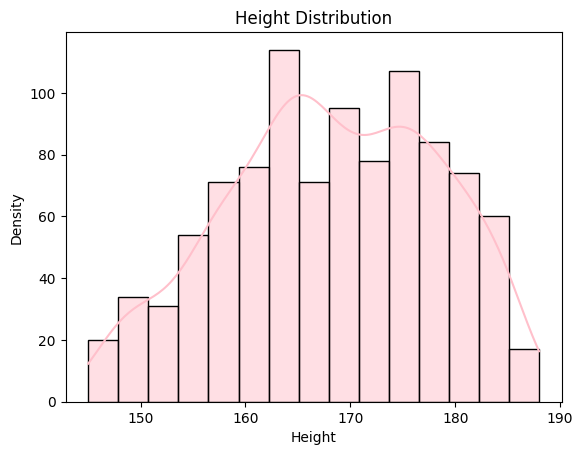

In [ ]:
sns.histplot(data['Height'], kde=True, color='pink')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

- The dataset includes 986 unique individuals, with heights ranging from 145 cm to 188 cm.
- The mean height of the individuals is approximately 168.18 cm, with the majority of individuals falling in the range of 165 to 175 cm.
- The height distribution shows a slightly right-skewed shape, with fewer individuals taller than 180 cm.
- About 15% of individuals are below 160 cm, while approximately 10% are taller than 180 cm, indicating that most individuals are of average height.
- The KDE line highlights a peak in density around 170 cm, suggesting it is the most common height in the dataset.
- Segmenting individuals into height categories such as short (145–160 cm), medium (161–175 cm), and tall (176–188 cm) could provide additional insights into the relationship between height and other variables, such as weight or insurance premium prices.
- This distribution reflects a relatively normal spread, suggesting that height can be used as a reliable predictor in further analyses, especially for correlations with health-related variables and premium pricing.

#### Weight Distribution

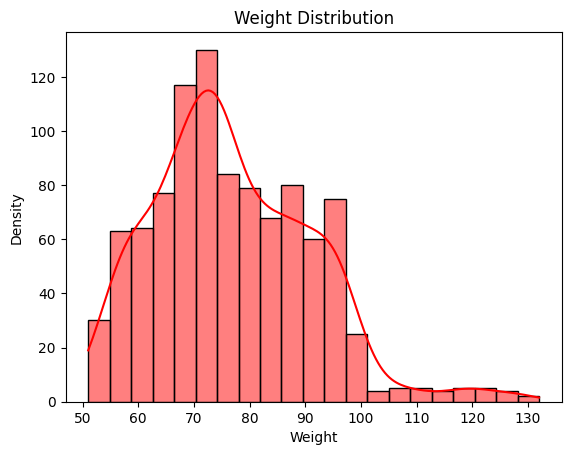

In [ ]:
sns.histplot(data['Weight'], kde=True, color='red')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

- The dataset includes 986 unique individuals, with weights ranging from 51 kg to 132 kg.
- The mean weight of the individuals is approximately 76.95 kg, with the majority of individuals falling in the range of 65 to 85 kg.
- The weight distribution shows a slight right skew, with fewer individuals weighing above 100 kg.
- About 15% of individuals weigh less than 60 kg, while approximately 8% weigh above 100 kg, indicating that the dataset primarily represents individuals with average weight.
- The KDE line highlights a peak in density around 70–75 kg, suggesting it is the most common weight in the dataset.
- Segmenting individuals into weight categories such as low (50–65 kg), medium (66–85 kg), and high (86–132 kg) could provide additional insights into the relationship between weight and other variables, such as chronic diseases or premium pricing.
- This distribution is relatively normal and suitable for analysis without requiring transformation, making weight a strong candidate for correlation or regression analyses with health factors or insurance premiums.

#### Premium Price Distribution

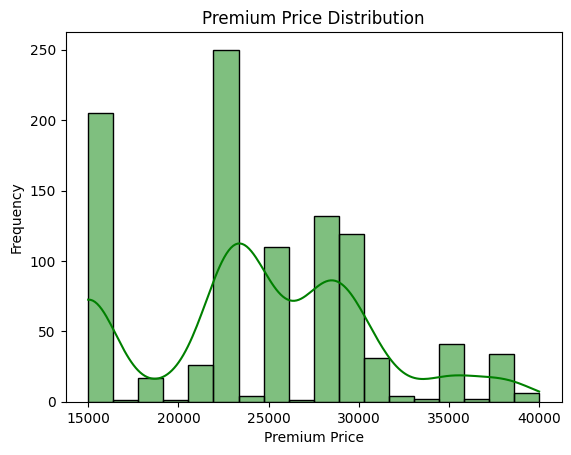

In [ ]:
sns.histplot(data['PremiumPrice'], kde=True, color='green')
plt.title('Premium Price Distribution')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

- The dataset includes insurance premiums ranging from 15,000 to 40,000.
- The average premium price is approximately 24,336.71, with most premiums falling in the range of 21,000 to 29,000.
- The distribution is multi-modal, with distinct peaks observed at approximately 17,500, 22,500, and 27,500.
- A small proportion of individuals have higher premiums (above 35,000), potentially indicating customers with multiple health risk factors or special coverage needs.
- A significant number of individuals fall in the lower premium range (15,000–20,000), suggesting a relatively healthy population or those with minimal insurance coverage.
- The KDE line suggests that premiums are concentrated around specific tiers, potentially reflecting pricing structures or brackets based on demographic or health-related variables.

#### Number of Major Surgeries Distribution

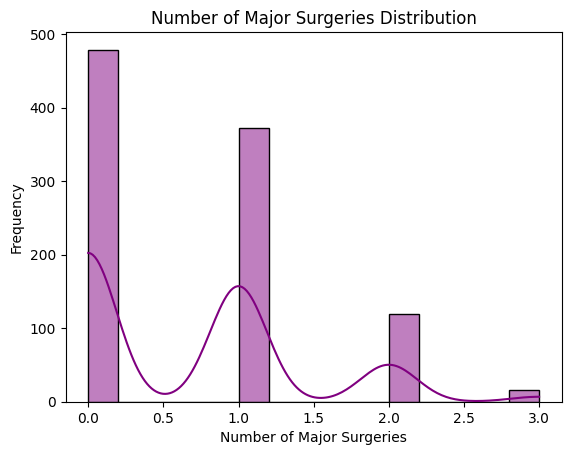

In [ ]:
sns.histplot(data['NumberOfMajorSurgeries'], kde=True, color='purple')
plt.title('Number of Major Surgeries Distribution')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Frequency')
plt.show()

- The dataset represents the distribution of the number of major surgeries undergone by individuals, ranging from 0 to 3.
- The majority of individuals have undergone 0 surgeries, with a significant peak also observed for those who have undergone 1 surgery.
- The average number of surgeries appears to be low, with most individuals concentrated in the range of 0 to 1 surgeries.
- The distribution is multi-modal, with distinct peaks at 0, 1, and smaller peaks at 2 surgeries.
- A small proportion of individuals have undergone 3 surgeries, potentially indicating patients with severe health conditions requiring repeated interventions.
- The KDE line suggests a strong clustering around 0 and 1 surgeries, reflecting a generally healthier population or those less prone to requiring surgical interventions.

#### Boxplots for Binary / Categorical Variables

In [ ]:
binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
color_palette = sns.color_palette()

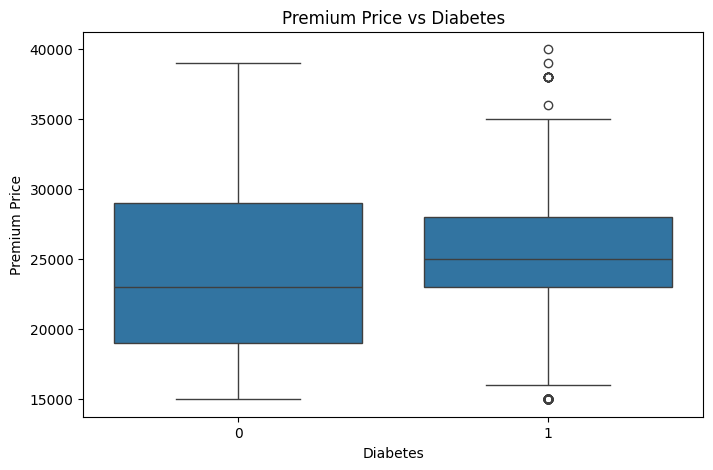

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[0], y='PremiumPrice', data=data, color=color_palette[0])
plt.title('Premium Price vs {col}'.format(col=binary_columns[0]))
plt.xlabel(binary_columns[0])
plt.ylabel('Premium Price')
plt.show()

- Individuals without diabetes (0) tend to have a slightly higher range in premium prices, with the interquartile range (IQR) spanning from around 20,000 to 30,000.
- Individuals with diabetes (1) have a more concentrated premium price range, with the IQR falling roughly between 18,000 and 26,000.
- The median premium price for individuals without diabetes is higher compared to those with diabetes.
- Groups show the presence of outliers, especially individuals with diabetes, suggesting that some individuals with diabetes are paying significantly higher premiums.

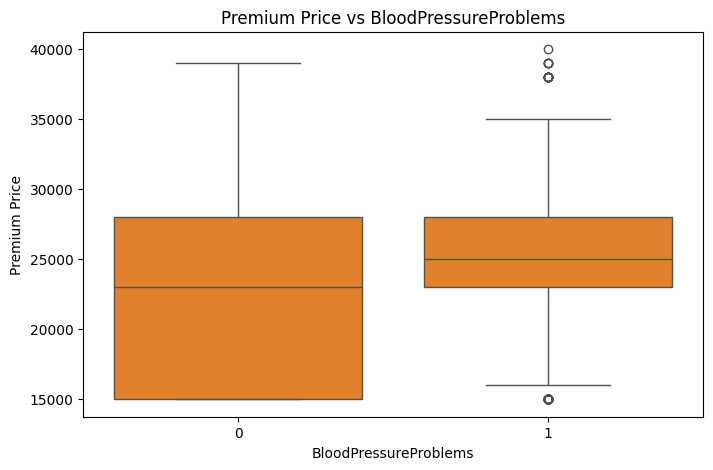

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[1], y='PremiumPrice', data=data, color=color_palette[1])
plt.title('Premium Price vs {col}'.format(col=binary_columns[1]))
plt.xlabel(binary_columns[1])
plt.ylabel('Premium Price')
plt.show()

- Individuals without blood pressure problems tend to have a slightly higher median premium price compared to those with blood pressure issues.
- The interquartile range (IQR) for individuals without blood pressure problems is wider, ranging approximately between 15,000 and 28,000, suggesting greater variability in premium prices.
- Individuals with blood pressure problems show a narrower IQR, concentrated between 23000 and 28,000, indicating more consistent premium pricing within this group.
- Outliers exists, with some individuals with blood pressure problems categoriy having significantly higher premium prices.
- Overall, blood pressure problems appear to influence premium prices to some extent, but the differences are not dramatic and may be affected by other health factors.

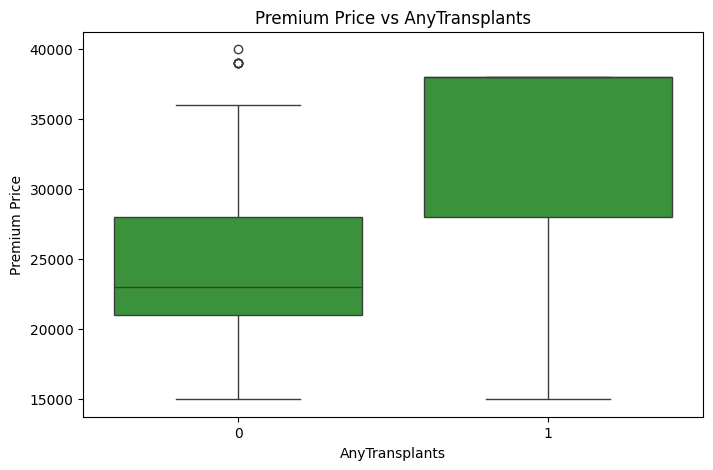

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[2], y='PremiumPrice', data=data, color=color_palette[2])
plt.title('Premium Price vs {col}'.format(col=binary_columns[2]))
plt.xlabel(binary_columns[2])
plt.ylabel('Premium Price')
plt.show()

- Individuals who have undergone transplants generally have higher premium prices compared to those who have not.
- The median premium price for individuals with transplants is significantly higher, with a visibly higher interquartile range (IQR).
- Premium prices for individuals with transplants show a wider distribution, indicating greater variability in costs.
- For individuals without transplants, the premium prices are more concentrated, with most falling within a lower and narrower range.
- Outliers are observed in the group without transplants, suggesting some individuals in this category still have relatively high premium costs.
- Transplants seem to be a major factor influencing premium pricing, likely due to the associated medical risks and healthcare needs.

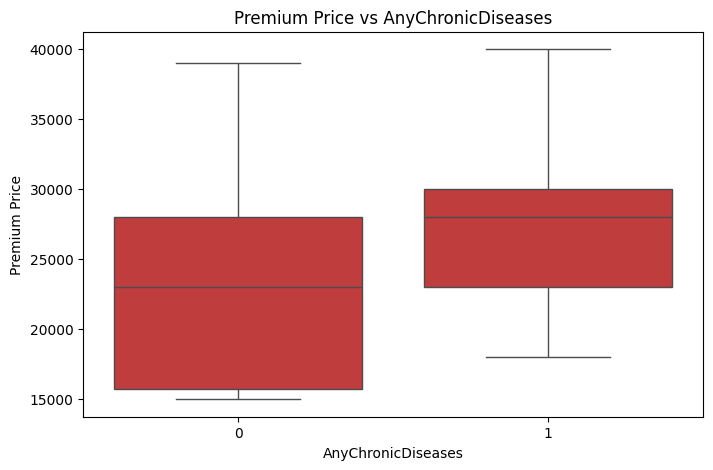

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[3], y='PremiumPrice', data=data, color=color_palette[3])
plt.title('Premium Price vs {col}'.format(col=binary_columns[3]))
plt.xlabel(binary_columns[3])
plt.ylabel('Premium Price')
plt.show()

- Individuals with chronic diseases tend to have slightly higher premium prices compared to those without chronic diseases.
- The median premium price for individuals with chronic diseases is higher than for those without.
- The interquartile range (IQR) for both groups is similar, indicating comparable levels of variability in premium prices.
- The overall distribution of premium prices for individuals with chronic diseases shows a slight upward shift compared to those without chronic diseases.
- There are no significant outliers in either group, suggesting that premium pricing for both groups is relatively stable.
- Chronic diseases contribute to an increase in premium prices, likely due to the higher risk and healthcare costs associated with such conditions.

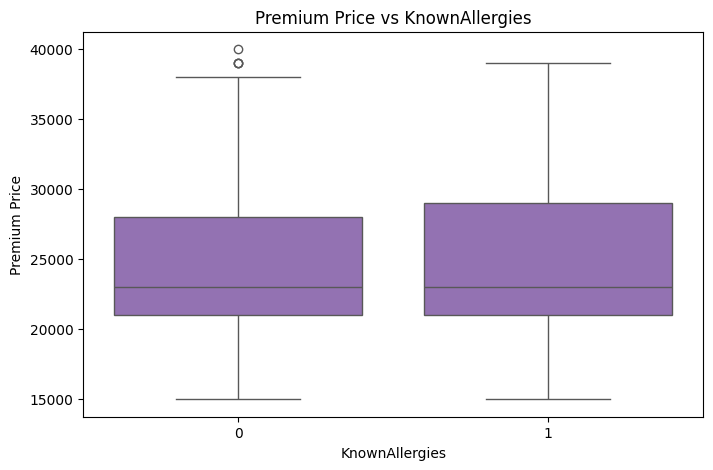

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[4], y='PremiumPrice', data=data, color=color_palette[4])
plt.title('Premium Price vs {col}'.format(col=binary_columns[4]))
plt.xlabel(binary_columns[4])
plt.ylabel('Premium Price')
plt.show()

- Individuals with known allergies have a slightly higher median premium price compared to those without allergies.
- The interquartile range (IQR) for both groups is relatively similar, indicating that variability in premium prices is consistent across both groups.
- There are some outliers in the group without known allergies, indicating that a few individuals may have significantly higher premium prices.
- The overall distribution of premium prices for individuals with known allergies shows a slight upward shift, reflecting higher premiums associated with the presence of allergies.
- Known allergies appear to contribute to a moderate increase in premium prices, likely due to the potential for increased healthcare usage.
- The range of premium prices is broader for individuals without known allergies, as the whiskers for this group extend further.

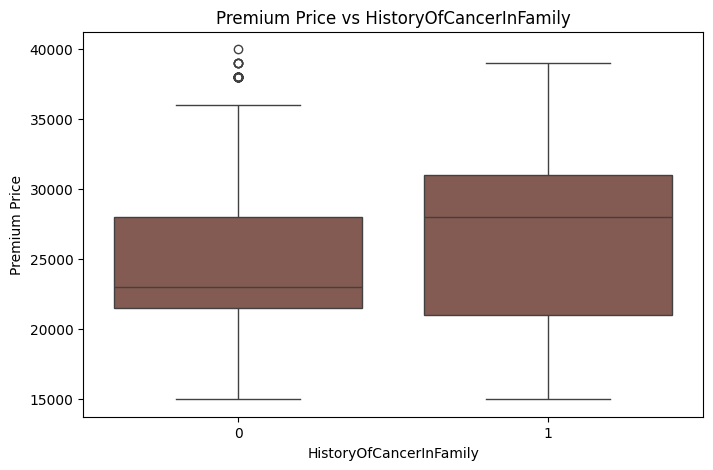

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=binary_columns[5], y='PremiumPrice', data=data, color=color_palette[5])
plt.title('Premium Price vs {col}'.format(col=binary_columns[5]))
plt.xlabel(binary_columns[5])
plt.ylabel('Premium Price')
plt.show()

- Individuals with a history of cancer in their family tend to have higher median premium prices compared to those without such a history.
- The interquartile range (IQR) for individuals with a history of cancer in their family is narrower, suggesting less variation in premium prices within this group.
- Outliers are present in both groups, but they are more prominent in the group with a history of cancer, indicating that some individuals in this group are paying significantly higher premiums.
- The overall range of premium prices is similar for both groups, as the whiskers of the boxplot extend to similar levels.
- A history of cancer in the family likely serves as a risk factor, contributing to slightly elevated premiums due to potential hereditary risks.
- Despite the higher median premium, the data suggests that the presence of this history doesn't drastically alter the premium range compared to those without it.

#### Proportions for Binary / Categorical Variables

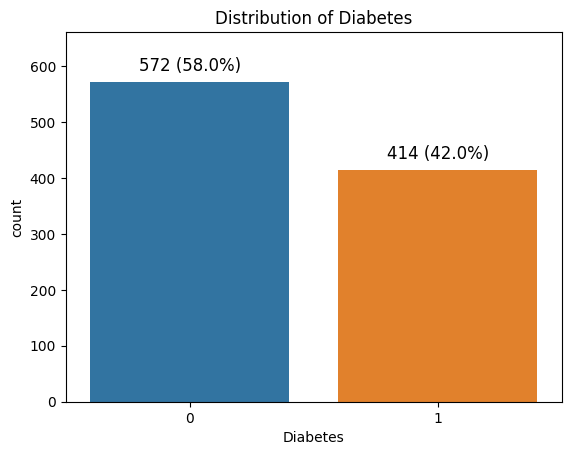

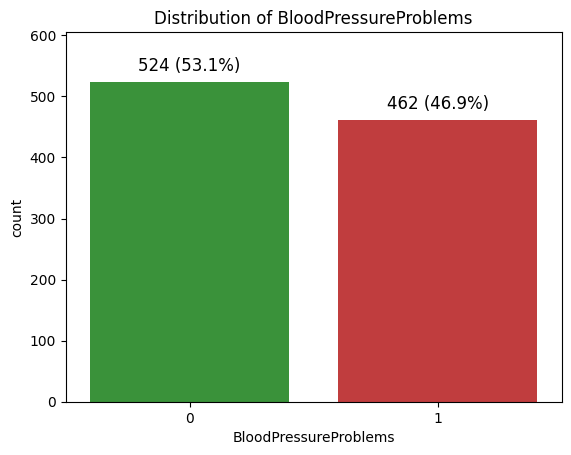

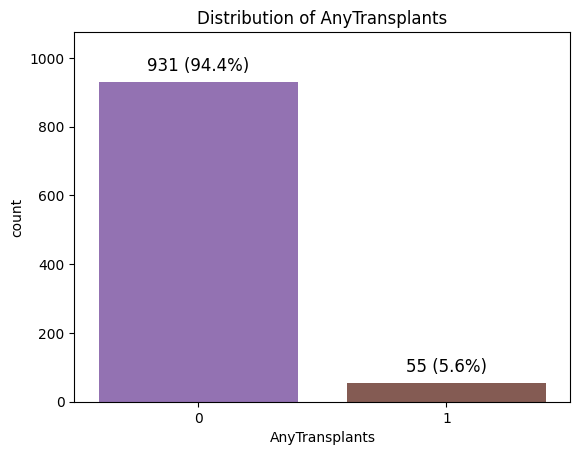

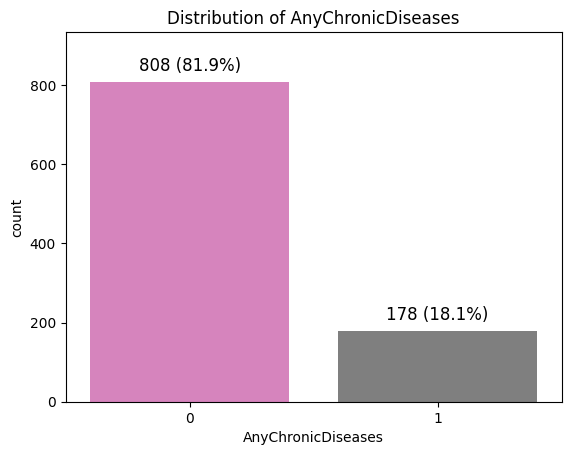

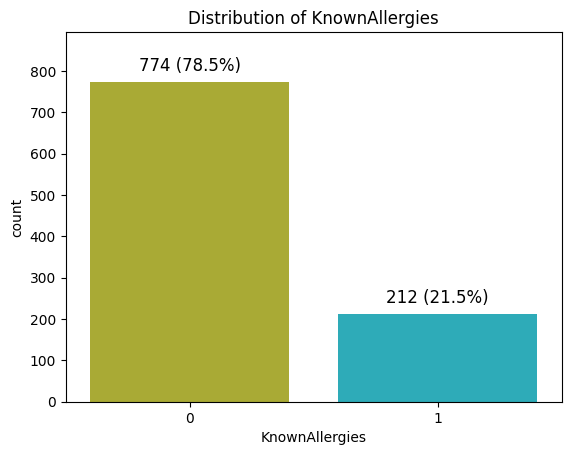

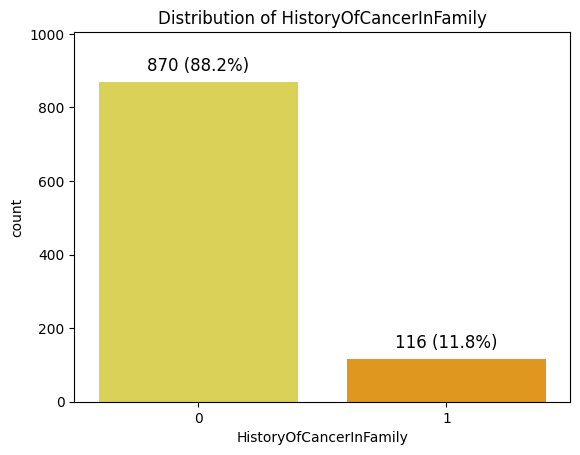

In [ ]:
# List of binary columns
binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                  'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

# Assign unique colors to each binary column using a distinct set of colors
unique_colors = {
    'Diabetes': ['#1f77b4', '#ff7f0e'],  # Blue, Orange
    'BloodPressureProblems': ['#2ca02c', '#d62728'],  # Green, Red
    'AnyTransplants': ['#9467bd', '#8c564b'],  # Purple, Brown
    'AnyChronicDiseases': ['#e377c2', '#7f7f7f'],  # Pink, Grey
    'KnownAllergies': ['#bcbd22', '#17becf'],  # Yellow, Teal
    'HistoryOfCancerInFamily': ['#f0e442', '#ff9f00']  # Light Yellow, Orange
}

# Plot each binary column with its corresponding unique colors
for var in binary_columns:
    # Create countplot with the corresponding unique colors
    ax = sns.countplot(data=data, x=var, hue=var, palette=unique_colors[var], dodge=False, legend=False)
    plt.title(f'Distribution of {var}')

    # Increase the upper y-limit by 10% for better space
    ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

    # Get the total count for each category (0 and 1)
    total = len(data)

    # Add count labels and percentage labels on top of the bars
    for p in ax.patches:
        # Get the height of the bar (count)
        count = int(p.get_height())
        # Calculate percentage
        percentage = (count / total) * 100
        # Annotate the percentage on top of the bar
        ax.annotate(f'{count} ({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.show()

- **Diabetes:** About 42% of individuals have diabetes, which is a significant health concern. It should be considered an important factor in determining health insurance premiums.

- **Blood Pressure Problems:** Nearly 47% of individuals have blood pressure issues, so this condition should also be considered in risk assessments and insurance premium calculations.

- **Any Transplants:** Only 5.6% of individuals have had a transplant, which is rare. Though it's uncommon, it should be monitored as it may significantly affect healthcare costs.

- **Any Chronic Diseases:** 18% of individuals have chronic diseases. While less common, individuals with chronic conditions may need more healthcare, so insurers should consider them when setting premiums.

- **Known Allergies:** 21.5% of individuals have allergies. Although not always severe, allergies can lead to ongoing treatment, and insurers should keep them in mind for pricing.

- **History of Cancer in Family:** 11.8% of individuals have a family history of cancer. This increases the risk, so individuals with such a history may face higher premiums.

### **Correlation Analysis**

- A correlation matrix to identify relationships between numerical variables, focusing on predictors and premium prices

#### Heatmap for Correlation Matrix

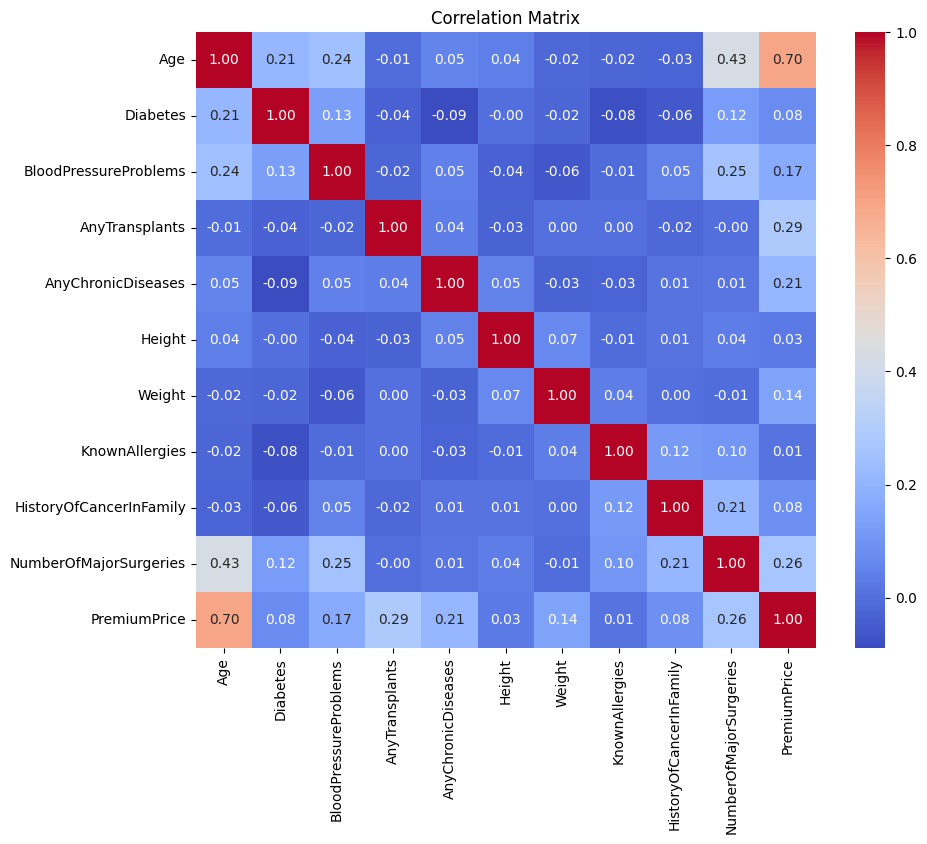

In [ ]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- **Age and PremiumPrice:** There is a strong positive correlation (0.70) between age and premium price, suggesting that older individuals tend to pay higher premiums.
- **NumberOfMajorSurgeries and PremiumPrice:** A moderate positive correlation (0.26) indicates that individuals with a higher number of major surgeries tend to have slightly higher premiums.
- **AnyTransplants and PremiumPrice:** There is a weak positive correlation (0.29), suggesting that individuals with transplants may face higher premiums, though the effect is less pronounced.
- **BloodPressureProblems and PremiumPrice:** A weak positive correlation (0.17) suggests a mild increase in premium prices for individuals with blood pressure issues.
- **Height, Weight, and PremiumPrice:** Both features show almost no correlation with premium price, indicating they have minimal or no direct impact on pricing.
- **KnownAllergies and PremiumPrice:** A negligible correlation (-0.02) suggests no meaningful relationship between known allergies and premium prices.
- **HistoryOfCancerInFamily and PremiumPrice:** A weak positive correlation (0.08) indicates a slightly higher premium for individuals with a family history of cancer.
- **Diabetes and PremiumPrice:** A very weak positive correlation (0.08) suggests that diabetes has little impact on premium pricing.
- **Overall Observation:** Age has the strongest influence on premium price, followed by the number of major surgeries and transplant history, while other factors like height, weight, and allergies show minimal impact.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df = data.copy()
X = df.drop('PremiumPrice', axis=1)  # Assuming 'PremiumPrice' is the target variable
X_const = add_constant(X)  # Add constant for intercept
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data

,Variable,VIF
0,const,307.363655
1,Age,1.320224
2,Diabetes,1.077959
3,BloodPressureProblems,1.110788
4,AnyTransplants,1.004616
5,AnyChronicDiseases,1.021107
6,Height,1.013236
7,Weight,1.010850
8,KnownAllergies,1.033877
9,HistoryOfCancerInFamily,1.079318


In [ ]:
# Extract the correlation values for 'PremiumPrice' specifically
premium_price_corr = correlation_matrix['PremiumPrice'].sort_values(ascending=False)

# Display the correlation values
print(premium_price_corr)

PremiumPrice               1.000000
Age                        0.697540
AnyTransplants             0.289056
NumberOfMajorSurgeries     0.264250
AnyChronicDiseases         0.208610
BloodPressureProblems      0.167097
Weight                     0.141507
HistoryOfCancerInFamily    0.083139
Diabetes                   0.076209
Height                     0.026910
KnownAllergies             0.012103
Name: PremiumPrice, dtype: float64


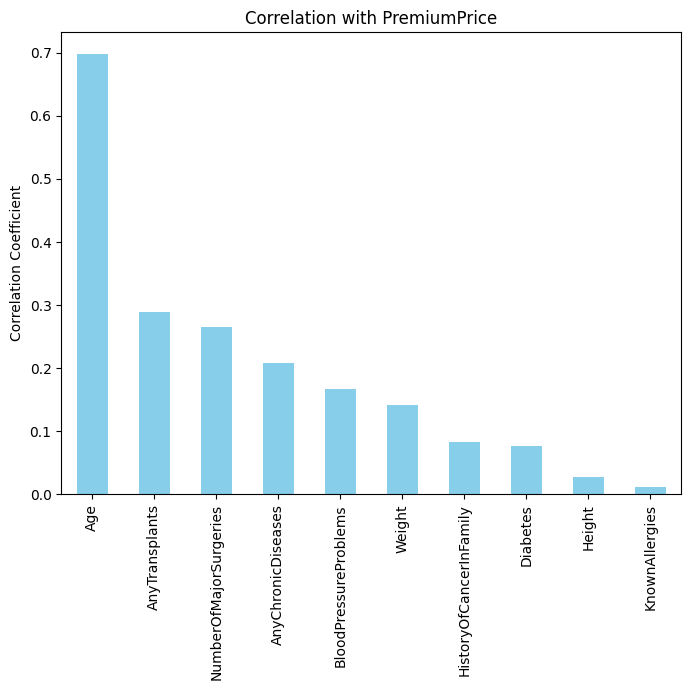

In [ ]:
# Plot the correlation between PremiumPrice and other predictors
plt.figure(figsize=(8, 6))
premium_price_corr.drop('PremiumPrice').plot(kind='bar', color='skyblue')
plt.title('Correlation with PremiumPrice')
plt.ylabel('Correlation Coefficient')
plt.show()

- Age has the strongest positive correlation with PremiumPrice.
- Other factors like AnyTransplants, NumberOfMajorSurgeries, and AnyChronicDiseases show weak to moderate positive correlations.
- Factors like Height, KnownAllergies, and HistoryOfCancerInFamily show very weak or negligible correlations with PremiumPrice.

### Feature Engineering

In [ ]:
data['BMI'] = round(data['Weight'] / (data['Height'] / 100) ** 2,2)

In [ ]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.73
1,60,1,0,0,0,180,73,0,0,0,29000,22.53
2,36,1,1,0,0,158,59,0,0,1,23000,23.63
3,52,1,1,0,1,183,93,0,0,2,28000,27.77
4,38,0,0,0,1,166,88,0,0,1,23000,31.93


In [ ]:
# Add BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

In [ ]:
data['BMICategory'] = data['BMI'].apply(bmi_category)

In [ ]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMICategory
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,Normal Weight
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,Normal Weight
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,Normal Weight
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obesity


#### BMI Analysis

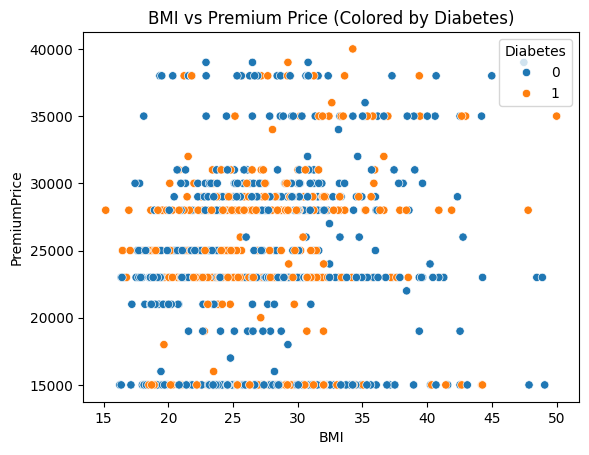

In [ ]:
sns.scatterplot(x='BMI', y='PremiumPrice', hue='Diabetes', data=data)
plt.title('BMI vs Premium Price (Colored by Diabetes)')
plt.show()

- Higher BMI doesn't always mean higher premium prices; prices are scattered across the range.

- People with diabetes (orange dots) are more common at higher BMI levels but appear in all premium price ranges.

- Premium prices seem to cluster around specific levels like 15000, 23000, 25000, 28000, and 35,000.

- Both diabetic and non-diabetic individuals are spread across all BMI and premium price levels, but diabetes seems slightly linked to higher BMI.

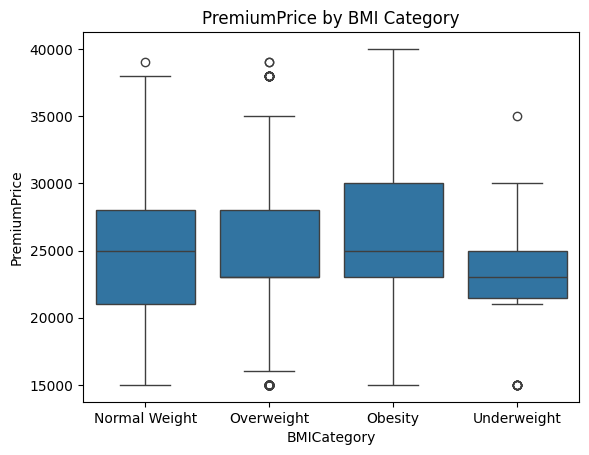

In [ ]:
# Boxplot of PremiumPrice by BMI Category
sns.boxplot(x='BMICategory', y='PremiumPrice', data=data)
plt.title('PremiumPrice by BMI Category')
plt.show()

**Normal Weight (BMI 18.5 - 24.9):**
*   Average Premium: 23,727.85 currency units (moderate premium).
*   Variation: Moderate standard deviation (5,624.94), indicating some diversity in premiums.
*   Range: Premiums range from 15,000 to 39,000.
*   Middle Range: Most individuals have premiums between 21,000 and 28,000.
*   Observation: Premium prices for normal weight individuals are relatively balanced, with a significant portion clustered around the median.



**Overweight (BMI 25 - 29.9):**
*  Average Premium: 24,287.07 currency units (higher than normal weight but lower than obesity).
*  Variation: Moderate standard deviation (6,185.65), showing some variation in premiums, though lower than obesity.
*  Range: Premiums range from 15,000 to 39,000.
*  Middle Range: The majority of premiums are between 23,000 and 28,000.
*  Observation: Overweight individuals tend to have premiums slightly higher than normal weight but lower than those with obesity. The variation is moderate, similar to the obesity category.

**Obesity (BMI ≥ 30):**
*   Average Premium: 25,174.60 currency units (highest among all categories).
*   Variation: High standard deviation (6,928.98), indicating considerable variability in premiums.
*   Range: Premiums span from 15,000 to 40,000.
*   Middle Range: Most premiums fall between 23,000 and 30,000.
*   Observation: Obesity leads to higher premium prices, likely due to greater health risks. The high standard deviation suggests some outliers paying significantly more.




**Underweight (BMI < 18.5):**

* Average Premium: 22,868.42 currency units (lowest average among all categories).
* Variation: Low standard deviation (4,932.91), indicating relatively stable premium prices.
* Range: Premiums range from 15,000 to 35,000.
* Middle Range: Most premiums fall between 21,500 and 25,000.
* Observation: Underweight individuals have the lowest premiums with the least variability. This could reflect lower health risks associated with being underweight.

### **Outlier Detection**

#### Boxplot for Outlier Detection

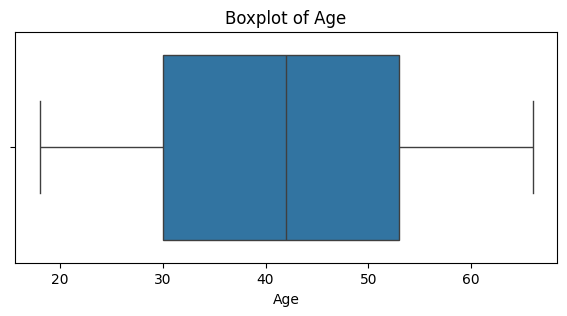

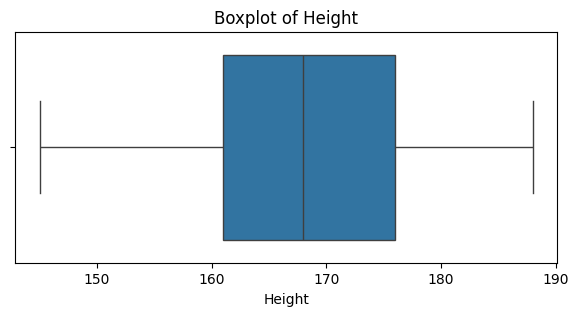

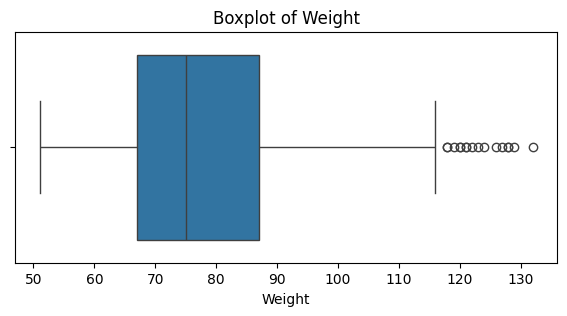

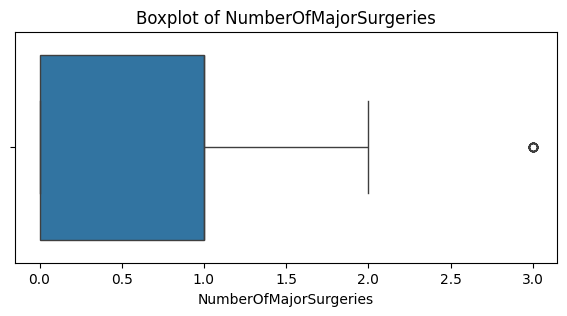

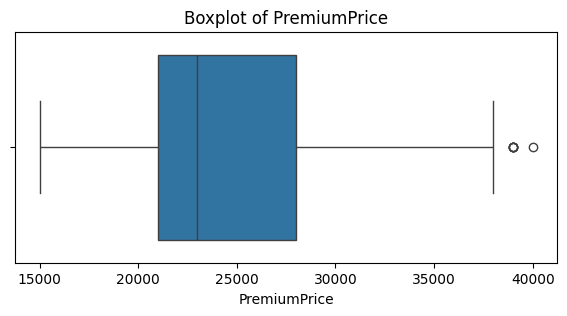

In [ ]:
def box_plot(col):
    plt.figure(figsize = (7,3))
    sns.boxplot(x = data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

for col in num_cols:
    box_plot(col)

#### IQR Method for Outlier Detection

In [ ]:
summary_table = pd.DataFrame()

for i in num_cols:
    Q1 = data[i].quantile(0.25)  # First quartile
    Q3 = data[i].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    lower_bound = Q1 - 1.5 * IQR # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR # Upper bound for outliers

    # statistics for the column
    summary_table[i] = [
        data[i].min(),
        data[i].max(),
        data[i].mean(),
        data[i].median(),
        Q1,
        Q3,
        lower_bound,
        upper_bound,
        len(data[(data[i] < lower_bound) | (data[i] > upper_bound)])]

summary_table = summary_table.T
summary_table.columns = ['Min', 'Max', 'Mean', 'Median', 'Q1', 'Q3', 'Lower Bound', 'Upper Bound', 'Outliers Count']

summary_table

,Min,Max,Mean,Median,Q1,Q3,Lower Bound,Upper Bound,Outliers Count
Age,18.0,66.0,41.745436,42.0,30.0,53.0,-4.5,87.5,0.0
Height,145.0,188.0,168.182556,168.0,161.0,176.0,138.5,198.5,0.0
Weight,51.0,132.0,76.950304,75.0,67.0,87.0,37.0,117.0,16.0
NumberOfMajorSurgeries,0.0,3.0,0.667343,1.0,0.0,1.0,-1.5,2.5,16.0
PremiumPrice,15000.0,40000.0,24336.713996,23000.0,21000.0,28000.0,10500.0,38500.0,6.0


- Age and Height are well-distributed without any extreme values (outliers), and the data appears balanced around the average.
- Weight and Number of Major Surgeries have several extreme values (outliers). This could indicate a lot of variability in the data or the presence of some unusual cases.
- Premium Price has a few extreme values at both the high and low ends, suggesting that some individuals have significantly different premium price compared to others.

#### Remove outliers from IQR detection

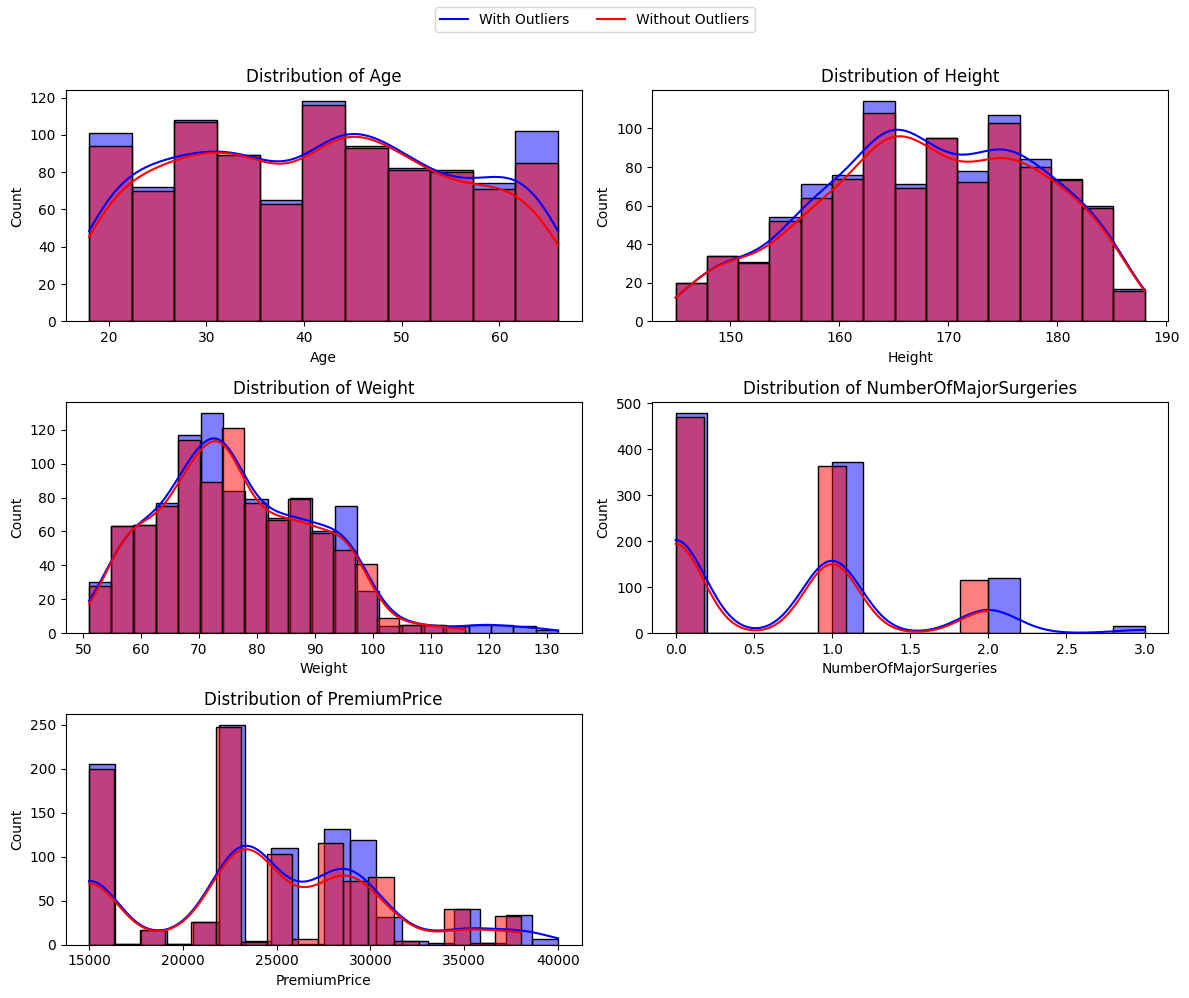

In [ ]:
data_no_outliers_iqr = data.copy()
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers_iqr = data_no_outliers_iqr[(data_no_outliers_iqr[col] >= lower_bound) & (data_no_outliers_iqr[col] <= upper_bound)]

# Adjust the subplot grid to accommodate all num_cols
num_rows = (len(num_cols) + 1) // 2  # Calculate the number of rows needed
num_cols_plot = min(len(num_cols), 2) # Use a maximum of 2 columns

fig, axes = plt.subplots(num_rows, num_cols_plot, figsize=(12, 10))

# Flatten axes if necessary (flatten only if num_rows > 1 or num_cols_plot > 1)
if num_rows * num_cols_plot > 1:
    axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]  # Get the appropriate subplot axis
    sns.histplot(data[col], kde=True, ax=ax, color='blue', label='With Outliers')
    sns.histplot(data_no_outliers_iqr[col], kde=True, ax=ax, color='red', label='Without Outliers')
    ax.set_title(f'Distribution of {col}')

# Add a common legend for all subplots
fig.legend(['With Outliers', 'Without Outliers'], loc='upper center', ncol=2, fontsize=10)

# Remove empty charts if they exist
if len(num_cols) % 2 != 0:  # If the number of columns is odd, remove the last (empty) plot
    fig.delaxes(axes[-1])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to leave space for the common legend
plt.show()

In [ ]:
# Create a summary table for both datasets
summary_with_outliers = data[num_cols].describe().T  # Summary for original data
summary_without_outliers = data_no_outliers_iqr[num_cols].describe().T  # Summary for data without outliers

# Add a column to differentiate between the two
summary_with_outliers['Dataset'] = 'With Outliers'
summary_without_outliers['Dataset'] = 'Without Outliers'

# Combine both summaries into one table
summary_table = pd.concat([summary_with_outliers, summary_without_outliers], axis=0)

# Reset index for better readability
summary_table.reset_index(inplace=True)
summary_table.rename(columns={'index': 'Column'}, inplace=True)

# Display the final table
summary_table.sort_values(by='Column')

,Column,count,mean,std,min,25%,50%,75%,max,Dataset
0,Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0,With Outliers
5,Age,949.0,41.478398,13.701797,18.0,30.0,42.0,52.0,66.0,Without Outliers
1,Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0,With Outliers
6,Height,949.0,168.208641,10.143105,145.0,161.0,168.0,176.0,188.0,Without Outliers
3,NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0,With Outliers
8,NumberOfMajorSurgeries,949.0,0.626976,0.691990,0.0,0.0,1.0,1.0,2.0,Without Outliers
4,PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0,With Outliers
9,PremiumPrice,949.0,24185.458377,6160.764594,15000.0,21000.0,23000.0,28000.0,38000.0,Without Outliers
2,Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0,With Outliers
7,Weight,949.0,76.146470,13.028719,51.0,67.0,75.0,86.0,116.0,Without Outliers


- The Age and Height columns didn't change much after removing outliers because they didn't have any big extreme values.
- The Weight, Number of Major Surgeries, and Premium Price columns were more affected. Removing outliers made their averages lower, their ranges smaller, and the variation less. This means these columns had some extreme values that were influencing the original numbers.

### **Hypothesis Testing**

#### 🎯 Premium Price for Chronic Disease vs No Chronic Disease

- Null Hypothesis (H₀): The mean premium cost for individuals with chronic diseases is equal to the mean premium cost for individuals without chronic diseases.

- Alternative Hypothesis (H₁): The mean premium cost for individuals with chronic diseases is not equal to the mean premium cost for individuals without chronic diseases.

In [ ]:
with_chronic = data[data['AnyChronicDiseases'] == 1]['PremiumPrice']
without_chronic = data[data['AnyChronicDiseases'] == 0]['PremiumPrice']

t_stat, p_value = ttest_ind(with_chronic, without_chronic)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 6.69104572734849, P-Value: 3.713413765291482e-11


In [ ]:
alpha = 0.05 # Significance Level

if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in premium costs.")
else:
    print("Fail to reject the null hypothesis: No significant difference in premium costs.")

Reject the null hypothesis: There is a significant difference in premium costs.


- Here p_value is less than Significance Level (alpha), it indicates a significant difference in premium costs between individuals with and without chronic diseases.
- Insurers can use this result to adjust premiums based on chronic disease presence.

#### 🎯 Premium Price Across Number of Surgeries

- Null Hypothesis (H₀): The mean premium price are the same across all groups defined by the number of major surgeries.

- Alternative Hypothesis (H₁): At least one group has a mean premium price that is significantly different from the others.

In [ ]:
SurgeriesCount = list(data['NumberOfMajorSurgeries'].unique())
surgery_groups = [data[data['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in SurgeriesCount]

f_stat, p_value = f_oneway(*surgery_groups)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 26.13539359740762, P-Value: 2.8711631377228097e-16


In [ ]:
alpha = 0.05 # Significance Level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices across surgery groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in premium prices across surgery groups.")

Reject the null hypothesis: There is a significant difference in premium prices across surgery groups.


- If the ANOVA test is significant (p_value < 0.05), we perform a post-hoc test to identify which groups differ. Use Tukey's HSD for pairwise comparisons. To identify specific groups that differ significantly.

In [ ]:
# Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['PremiumPrice'], groups=data['NumberOfMajorSurgeries'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 1773.2507 0.0001   702.2872 2844.2142   True
     0      2 5115.3489    0.0  3528.0508 6702.6469   True
     0      3 5031.3152 0.0058  1092.8776 8969.7529   True
     1      2 3342.0981    0.0  1710.0051 4974.1912   True
     1      3 3258.0645 0.1477  -698.6392 7214.7682  False
     2      3  -84.0336 0.9999 -4210.5402 4042.4729  False
----------------------------------------------------------


- **group1 and group2:** The two groups being compared (e.g., 0 surgeries vs. 1 surgery, 1 surgery vs. 2 surgeries, etc.).
- **meandiff:** The difference in the mean premium prices between the two groups.
- **p-adj:** The adjusted p-value for the comparison. If p_value < 0.05, the difference between the two groups is statistically significant.
- **lower and upper:** The confidence interval for the mean difference. If this interval does not include 0, it indicates a significant difference.
- **reject:** Indicates whether the null hypothesis (that the means are equal) is rejected (True) or not (False)

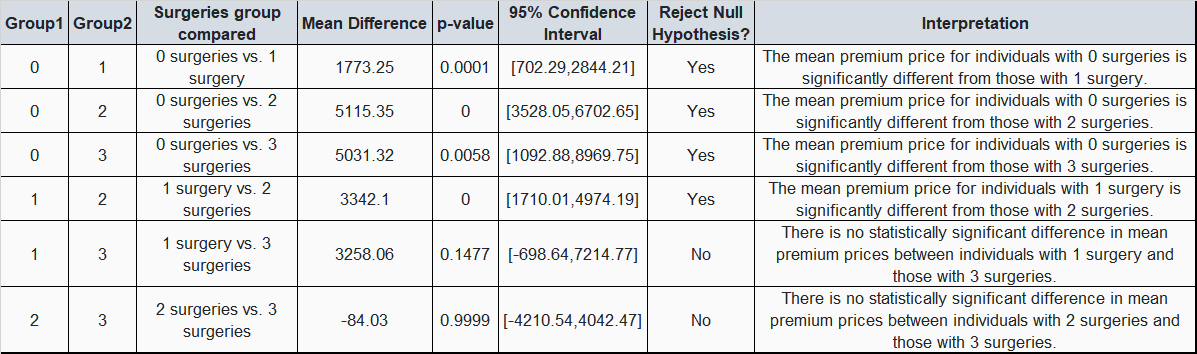

#### 🎯 Chronic Diseases and Family Cancer History

- Null Hypothesis (H₀): There is no significant association between the presence of chronic diseases and a family history of cancer. having chronic diseases does not influence whether a person has a family history of cancer.

- Alternative Hypothesis (H₁): There is a significant association between the presence of chronic diseases and a family history of cancer. individuals with chronic diseases are more likely to have a family history of cancer.

In [ ]:
# Create contingency table
contingency_table = pd.crosstab(data['AnyChronicDiseases'], data['HistoryOfCancerInFamily'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-Square Statistic: 0.02062393388215223
P-Value: 0.8858081638149811
Degrees of Freedom: 1
Expected Frequencies:
[[712.94117647  95.05882353]
 [157.05882353  20.94117647]]


In [ ]:
alpha = 0.05 # Significance Level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between chronic diseases and family cancer history.")
else:
    print("Fail to reject the null hypothesis: No significant association between chronic diseases and family cancer history.")

Fail to reject the null hypothesis: No significant association between chronic diseases and family cancer history.


- The p-value is greater than or equal to 0.05, we fail to reject the null hypothesis, suggesting that chronic diseases and family cancer history are independent (i.e., having chronic diseases does not significantly affect the likelihood of having a family history of cancer).

- By conducting this hypothesis test, we can determine whether the presence of chronic diseases significantly affects the likelihood of having a family history of cancer, which might have implications for predicting insurance premiums, risk management, and health interventions.

In [ ]:
df = data.copy()

In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMICategory
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,Normal Weight
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,Normal Weight
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,Normal Weight
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.46,Normal Weight
982,64,1,1,0,0,153,70,0,0,3,28000,29.90,Obesity
983,56,0,1,0,0,155,71,0,0,1,29000,29.55,Overweight
984,47,1,1,0,0,158,73,1,0,1,39000,29.24,Overweight


### **Regression Analysis**

- Null Hypothesis (H₀): The predictors (independent variable) have no significant effect on premium prices.
- Alternative Hypothesis (H₁): At least one predictor (independent variable) has a significant effect on premium prices.

In [ ]:
# Select predictors (features) and target (premium price)
features = ['Age', 'Weight', 'Height', 'Diabetes', 'BloodPressureProblems',
            'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

# Dependent / target variable
target = 'PremiumPrice'

# Split the data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Add a constant to the predictors for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_sm).fit()

# Summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     127.8
Date:                Fri, 17 Jan 2025   Prob (F-statistic):          1.13e-156
Time:                        03:28:47   Log-Likelihood:                -7612.1
No. Observations:                 788   AIC:                         1.525e+04
Df Residuals:                     777   BIC:                         1.530e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

Significant Predictors:
- Age: Older individuals have higher premiums, with an increase of 325.51 units per year of age.
- Weight: Higher weight is associated with higher premiums, with an increase of 69.54 units per unit of weight.
- AnyTransplants: Having a transplant significantly increases premiums (7489.57 units).
- AnyChronicDiseases: Chronic diseases lead to higher premiums (2547.54 units).
- HistoryOfCancerInFamily: A family history of cancer increases premiums (2119.82 units).
- NumberOfMajorSurgeries: More major surgeries result in lower premiums (-700.87 units).

Non-Significant Predictors:

- Height: No significant impact on premiums (p-value = 0.776).
- Diabetes: No significant effect on premiums (p-value = 0.164).
- BloodPressureProblems: Not a significant predictor (p-value = 0.583).
- KnownAllergies: No significant impact on premiums (p-value = 0.564).

Model Fit:
- R-squared: 62.2% of the variation in premium prices is explained by the predictors.
- Adjusted R-squared: 61.7% shows a well-fitting model considering the number of predictors.

Model Diagnostics:
- Durbin-Watson: 1.896, indicating no significant autocorrelation in residuals.
Multicollinearity: The condition number (3370) suggests potential multicollinearity issues.
- Non-normal residuals: Residuals are not normally distributed, indicating potential issues with model assumptions.

Strategic Implications for Insurers:
- Age, weight, and medical conditions should be prioritized in premium pricing.
- Family history of cancer and chronic diseases are key risk factors.
- Height and allergies might not need to be considered for premium pricing.
- Potential multicollinearity needs to be addressed for more reliable results.

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Print the model coefficients (impact of each feature)
print("Model Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Model Coefficients: [ 3.25506423e+02  6.95446175e+01 -3.89192769e+00 -3.96349602e+02
  1.58110629e+02  7.48956767e+03  2.54753510e+03  1.95117272e+02
  2.11982109e+03 -7.00874830e+02]
Intercept: 5381.505059183444


In [ ]:
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.7133944270278739
Mean Squared Error: 12221661.705858212


- The R-squared (0.7134) means the model explains about 71.34% of the changes in premium prices, which shows the model fits the data well.
- The MSE and RMSE (~3,496) tell us how far the predictions are from the actual prices on average. If premium prices usually range between 10,000 and 100,000, an error of about 3,496 is fairly reasonable.

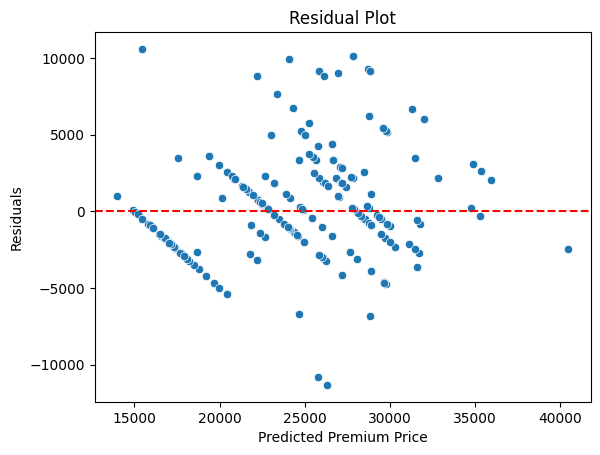

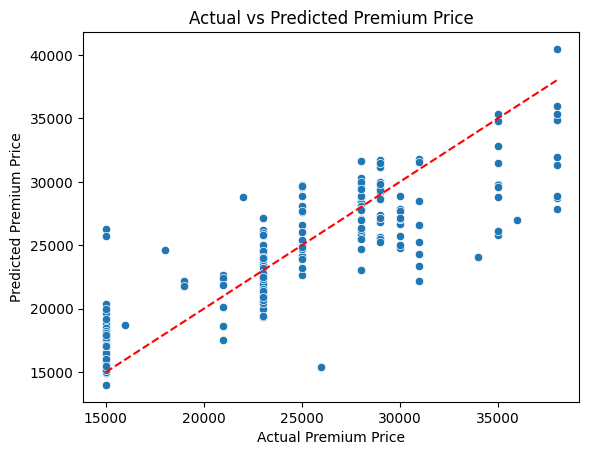

In [ ]:
# Residual Plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Premium Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Actual vs Predicted Plot
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Premium Price')
plt.ylabel('Predicted Premium Price')
plt.title('Actual vs Predicted Premium Price')
plt.show()

- The Residual Plot shows that the errors are mostly spread out evenly, but there are some patterns or clusters. This suggests the model could be improved by addressing issues like varying error sizes or adding more predictors.
- The Actual vs. Predicted Plot shows that the model predicts premium prices fairly well, as most points are close to the red diagonal line.

## **Insights / Observation**

🎯 The dataset represents a middle-aged population with common health conditions that affect insurance premiums.

🎯 Health issues like diabetes, blood pressure, and surgeries are key factors in determining premium prices.

🎯 The age distribution is fairly balanced, so age can be a good indicator for premium pricing.

🎯 Height is normally spread out, suggesting it could be useful for analyzing health and premium costs.

🎯 Weight is also spread out normally, which makes it suitable for analysis with health factors or premium pricing.

🎯 Weight is an important factor when analyzing its connection to health and premium costs.

🎯 The premium prices show multiple levels, which could reflect different customer profiles and health risks.

🎯 Most people in the dataset have no or only one surgery, suggesting that most are generally healthy.

🎯 People without diabetes usually have higher premiums and a broader range, while those with diabetes have a narrower range with some outliers paying much higher.

🎯 Blood pressure problems affect premiums, but the differences aren't huge.

🎯 Many factors contribute to premium prices, so it's important to consider all health conditions together.

🎯 Transplants have a strong effect on premium prices, likely due to the high medical risks and costs involved.

🎯 People with chronic diseases tend to have higher premiums because they often require ongoing healthcare.

🎯 Known allergies lead to moderate increases in premium prices due to frequent treatments.

🎯 The wider range of premium prices for people without allergies shows that other factors are involved.

🎯 A family history of cancer is a slight risk factor, so premiums may be a little higher for these individuals.

🎯 Even though those with a family history of cancer tend to have higher premiums, the difference isn't huge compared to those without this history.

🎯 Diabetes affects 42% of people and should be a key factor in setting premiums because of its impact on health costs.

🎯 Blood pressure problems are common (47%) and should also be considered in premium pricing as they increase health risks.

🎯 Transplants are rare (5.6%) but still important, as they can lead to high medical costs.

🎯 Chronic diseases affect 18% of people and should be reflected in premium pricing due to their ongoing healthcare needs.

🎯 Known allergies affect 21.5% of people and can lead to higher healthcare costs, which should be considered for pricing.

🎯 A family history of cancer affects 11.8% of people, raising their risk and leading to potentially higher premiums.

🎯 Rare conditions like transplants, chronic diseases, and family cancer history affect fewer people but can heavily impact premium prices.

🎯 Common conditions like diabetes and blood pressure problems affect almost half the population and should be prioritized for premium pricing.

🎯 Chronic conditions should be factored into regular risk assessments, while rare conditions should be handled individually.

🎯 Age is the most important factor affecting premium prices, followed by major surgeries and transplant history.

🎯 Height, weight, allergies, and diabetes don’t have a big impact on premium prices.

🎯 Age is the most important factor for premium pricing, with other health factors like transplants, surgeries, and chronic diseases having a moderate effect.

🎯 BMI and premium prices aren't strongly linked, but diabetes seems to have a slight connection to higher BMI, which could lead to higher premiums.

🎯 Obesity is associated with the highest premiums, due to increased health risks and medical costs.

🎯 People with normal weight and those who are overweight pay moderate premiums, with the overweight group paying a little more.

🎯 Underweight individuals pay the lowest premiums, showing lower health risks.